K-Means Silhouette Score: 0.0154


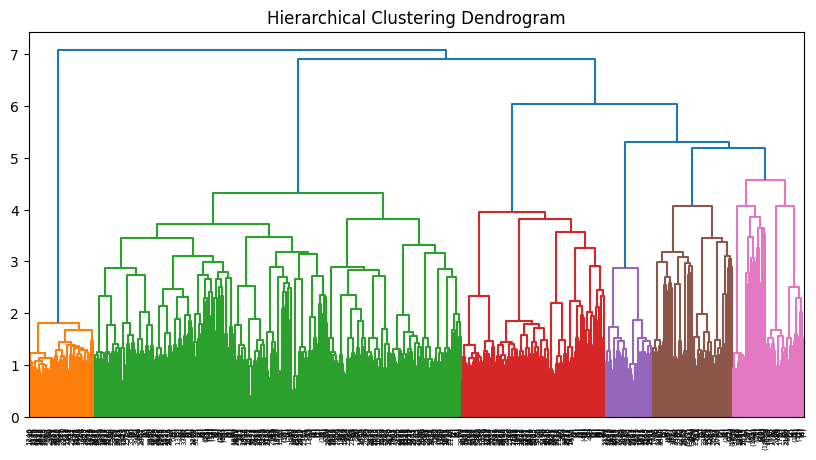

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
newsgroups = fetch_20newsgroups(subset='all', categories=categories, remove=('headers', 'footers', 'quotes'))

vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X = vectorizer.fit_transform(newsgroups.data)

kmeans = KMeans(n_clusters=len(categories), random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X)
kmeans_score = silhouette_score(X, kmeans_labels)
print(f"K-Means Silhouette Score: {kmeans_score:.4f}")

hierarchical = AgglomerativeClustering(n_clusters=len(categories), linkage='ward')
hierarchical_labels = hierarchical.fit_predict(X.toarray())

plt.figure(figsize=(10, 5))
plt.title("Hierarchical Clustering Dendrogram")
Z = linkage(X.toarray(), method='ward')
dendrogram(Z, truncate_mode="level", p=10)
plt.show()